# COGS 108 - Final Project: Attributes of a Restaurant that Contribute to their Health Inspection Score

# Overview

I am interested in speeding up the health inspection process for counties across America so that the time and money can be spent on more important matters. Therefore, I want to find what about a restaurant contributes to them receiving a score of 80 or lower for their health inspection score. I will be finding which variables correlate to the score the most and use these variables to create a model to find which features give the best accuracy score to predicting a score of 80 or below. Features that give the best accuracy score imply that these are the best classifiers for a low score.

# Name & GitHub

- Name: Joseph Bui
- GitHub Username: JosephBui21

# Research Question

What aspects (facility type, restaurant price range, type of food catered, and etc.) does a restaurant have that contributes to them receiving a mediocre, yet not perfect health inspection score (80 or below) given by the county food health inspectors?

## Background and Prior Work

For my project, I originally wanted to narrow it down to my home county, Santa Clara, as I am curious to what causes restaurants to receive a score of C (70 or below) for their health inspections. However, the data that I was provided does not contain much data about Santa Clara restaurants or restaurants that receive a score of 70 or below. Additionally, there was not a lot of data available online for Santa Clara retaurants and their health inspection scores. I could only find websites that showed data about why restaurants were shut down which would not help me figure out which aspects causes that problem. Therefore, in this project, I will be inspecting what about a restaurant causes their business to receive an 80 or below for their health inspection score. Based on an article I found online, it states "one of the most obvious and difficult reasons to discuss is the presence and infestation of various pests. From rats to roaches, this is the biggest no-no to commit" (Nutri-Rific). It is evident that pests and infestation of rodents and bugs are the main reasons why restaurants fail inspections as no one enjoys the idea of creepy animals scrambling around their ingredients or food. However, another important thing that causes restaurants to shut down are equipment issues. In addition to properly maintaining the food storage at a certain temperature, restaurants "keeping your equipment in tip-top shape not only makes for better food but keeps your employees safer too" (Nutri-Rific). There are factors other than vermins and poor storage temperatures that could contribute to the restaurants' poor health quality. For example, the amount of previous violations could contribute to how clean the restaurant is or the facility type of the business where different businesses have better resources than others (i.e. dine-in vs food truck). 

Prior to the establishment of the Food and Drug Administration (FDA), many food businesses were not regulated for their food production. It is important that businesses maintain their cleanliness of their restaurants so their customers do not acquire food poisoning regardless of whether or not they have an inspection test. In "The Rise of Food Poisoning in America", published 2014, the author writes "In the past eight years about half of a million Americans have become sick from E. coli 0157:H7." which is problematic as we expect fewer outbreaks of food poisoning with the regulations we have nowadays. Customers should not have to go through the trouble of receiving medical attention from enjoying food from their local businesses.

As a result, using data provided by the COGS 108 instructors, I can possibly identify the main contributors to these scores that restaurants are receiving to speed up the process of inspecting restaurants so counties could spend their time and money for more important matters such as homelessness. According to the white house, "over half a million Americans go homeless on a single night in the United States. About 35 percent (just under 200,000) are found sleeping unsheltered on our streets in places not intended for human habitation, such as sidewalks, parks, cars, or abandoned buildings" (https://www.whitehouse.gov/wp-content/uploads/2019/09/The-State-of-Homelessness-in-America.pdf). 

References (include links):
- 1) https://www.nutrirific.com/the-most-common-reasons-restaurants-fail-health-inspections/
- 2) https://www.downtoearth.org/articles/2009-03/30/rise-food-poisoning-america
- 3) https://www.whitehouse.gov/wp-content/uploads/2019/09/The-State-of-Homelessness-in-America.pdf

# Hypothesis


I hypothesize that both facility type and number of previous critical violations will have the most impact on what a business deserves a mediocre score of 80 or even lower. The reason to why I believe both of these variables will have the most influence is because businesses that have restaurant, dine-in facility types have the storage available to have equipments that will maintain food at certain temperatures. However, businesses such as food stands and push carts are at a disadvantage where they do not have the capability or storage to have the newest equipment to utilize for their produce. Additionally, I hypothesize the number of previous critical violations will greatly motivate a businesses to get a better score on their future health inspections as they would want to keep their business open. Of course having more features to help classify whether a restaurant received an 80 or lower than one feature itself, however, the results may differ. I will try to investigate whether there are other variables that can affect the score.

# Dataset(s)

- <b>Dataset Name:</b> Inspections
- <b>Link to the dataset:</b> 'inspections.csv'
- <b>Number of observations:</b> Health inspection has a dataset called 'inspections.csv' which contains data of <b>18466</b> restaurants' information and its previous inspection history. For example, it has the restaurants name, address, facility type, previous inspection date, number of critical inspections failed, and so on. This particular data can be helpful in helping us predict a restaurants' score based on its facility type and previous inspections. The data is stored in a dataframe called "inspections". 


- <b>Dataset Name:</b> Restaurants
- <b>Link to the dataset:</b> 'restaurants.csv'
- <b>Number of observations:</b> Health inspection has a dataset called 'restaurants.csv' which contains data of <b>3324</b> restaurants with its information. For instance, it contains the restaurant name, address, open date, facility type, and so on. This dataset will also be useful in helping determine whether facility types have significant differences in scores.

I plan to combine inspections and restaurants datasets together to have one data frame that contains information about the restaurant and its history of violations. To combine these datasets, I will use pandas built-in merge function to merge these datasets on matching columns such as `hsisid` and `name`.


# Setup

In [106]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# loading all the csv files into dataframes
inspections = pd.read_csv('inspections.csv')
inspections.head()
restaurants = pd.read_csv('restaurants.csv')
restaurants.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [107]:
#finding the best way to combine the datasets
print(inspections.columns)
print(restaurants.columns)

Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')
Index(['X.objectid', 'hsisid', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
       'y', 'geocodestatus'],
      dtype='object')


In [108]:
# combining the datasets together on matching columns
df = pd.merge(inspections, restaurants, on = ['hsisid', 'name', 'address1', 'address2', 'city',
                                             'state', 'postalcode', 'phonenumber', 
                                             'restaurantopendate', 'facilitytype', 'x', 'y', 'geocodestatus'], how = 'left')
df.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical,X.objectid
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [109]:
df.shape

(18466, 37)

# Data Cleaning

First, I notice that there are multiple rows that look like they have the same information, to ensure I do not have duplicates, I dropped duplicates which made no difference.

In [110]:
df = df.drop_duplicates()
df.shape

(18466, 37)

Next, I noticed that there are 37 columns which is reasonable as I merged 2 different dataframes on different columns. So, I want to assess the columns to see if there are repeated information from other columns. Here, I will remove columns that are useless to me as they contain missing values or repeated information of other variables. As seen below, these columns have missing values where I sorted them in descending order.

In [111]:
null = df.isnull().sum()
top = null.sort_values(ascending=False)[:17]
top #columns with missing values

X.objectid                               18466
address2                                 16571
description                              10516
previous_inspection_by_same_inspector     3051
num_non_critical_mean_previous            3045
num_critical_mean_previous                3045
num_non_critical_previous                 3045
num_critical_previous                     3045
days_since_previous_inspection            3045
previous_inspection_date                  3045
phonenumber                                501
second_match                                 6
top_match                                    6
avg_neighbor_num_non_critical                6
avg_neighbor_num_critical                    6
inspector_id                                 5
inspectedby                                  5
dtype: int64

The `X.objectid` contains all missing values, so I plan to drop this column. As seen below, I created a function that returned thee unique values of every column to see what the data looks like. For example, I noted that `address2` had different spellings of the word 'Suite' which would not be relevent to my question. It does give me information about whether the restaurant is in a building or outdoors which is could help answer my question, however, we already have this information through `facilitytype` so it was deleted. I deleted the `description` column as it contained text of descriptions of equipment of the restaurant and the restaurant itself. This would not be particularly helpful in finding what contributes to a score of 80 as I do not plan to use Natural Language Processing to find the semantics of the text. Additionally, the descriptions are mostly notes or suggestions the restaurant should make by the inspector which isn't particularly helpful in my case. `previous_inspection_by_same_inspector` contained boolean and missing values which wouldn't help answer my question. Lastly, `inspectedby`, `inspector_id`, `days_since_previous_inspection`, `previous_inspection_date`, and `phonenumber` was deleted because it contained string values of the inspectors which also wasn't relevant to my question.

In [112]:
l = []
for i in top.index:
    l.append(i)
def check_unique(arr):
    return df[arr].unique()

In [113]:
for i in l:
    print(check_unique(i))

[nan]
[nan 'STE 126' 'Ste 2121' 'ste.161' 'Suite 2089' 'STE 43' 'STE 106'
 'STE 102' 'STE 110' 'STE 104' 'Suite 11-A' 'YEAR ROUND' 'STE 238'
 'STE 113' 'STE 105' 'STE 101' 'Suit 314' 'STE 100' 'Ste 115' 'Zone 3'
 'STE 112' '#100' 'C110' '#104 STE 104' 'Ste 100' 'STE 116-A' 'STE 119'
 'Suite 9-A' 'STE 8-B' 'Suite 110' '#121' 'STE 1509' 'RALEIGH' 'Ste 111'
 'Suite G' 'STE 109' 'Ste 110' 'Ste. 2034' 'Ste.100' 'Ste 147' 'STE 147'
 'Suite 2037' 'Suite 108' 'Ste 109' 'STE' 'Ste 101' '1107-102 Walnut St'
 'FC 2' 'Ste 129' 'P O BOX 1138' 'Suite E' 'Suite 115' '#107' 'Ste. 116'
 'Ste 12' 'P.O. BOX 220' 'PL #100' '#J' 'STE 153' 'SUITE 700' 'STE 1040'
 'Ste 105' 'SUITE 101' 'Suite 104' 'STE 114' 'STE 164' 'STE 201'
 'ste. 105' 'STE 2038' 'STE 15' '# U212' 'Ste 140' 'STE 140' "ROSE'S"
 'Building R' 'SUITE C-1' 'STE 103' 'STE 7' 'STE 601' 'STE 133' 'STE 400'
 'Ste. 110' 'STE 5' 'STE 232' 'STE 129' 'Ste. 107' 'STE 125' 'STE H'
 'STE 150' 'STE 1121' 'STE 135' 'STE 148' 'STE FC 1112' 'Ste 118'
 '@ WAL

In [114]:
df = df.drop(columns = ['X.objectid', 'address2', 'description', 
                        'previous_inspection_by_same_inspector', 'inspectedby', 'inspector_id', 
                        'previous_inspection_date', 'phonenumber', 'days_since_previous_inspection'])
#forgot to drop the address and name for ethic purposes
df = df.drop(columns = ['name', 'address1'])
df.head()

,hsisid,date,city,state,postalcode,restaurantopendate,days_from_open_date,facilitytype,x,y,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,raleigh,NC,27610,2002-12-21T00:00:00Z,3562,Restaurant,-78.587963,35.783914,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,raleigh,NC,27610,2004-05-04T00:00:00Z,3062,Restaurant,-78.549673,35.791986,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,raleigh,NC,27610,2008-08-04T00:00:00Z,1509,Restaurant,-78.547960,35.723125,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,cary,NC,27513,2012-03-28T00:00:00Z,177,Restaurant,-78.815727,35.799249,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,zebulon,NC,27597,2008-02-25T00:00:00Z,1670,Food Stand,-78.296347,35.831285,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


After assessing the columns with nominal values, I will be dealing with missing values in columns with quantitative values. These columns include: `num_non_critical_mean_previous`, `num_critical_mean_previous`, `num_non_critical_previous`, `num_critical_previous`, `second_match`, `top_match`, `avg_neighbor_num_non_critical`, and `avg_neighbor_num_critical`. As seen below, I will be imputing the mean of `top_match`, `second_match`, `num_non_critical_mean_previous`, `num_critical_mean_previous`, `avg_neighbor_num_non_critical`, and `avg_neighbor_num_critical` because these are averages and not counts. I will need to fill `num_non_critical_previous` and `num_critical_previous` with 0 as these missing values were due to restaurants having their first inspections, so they do not have a previous count of violations.

In [116]:
df[['num_non_critical_mean_previous', 'num_critical_mean_previous',
   'second_match', 'top_match', 'avg_neighbor_num_non_critical',
   'avg_neighbor_num_critical']] = df[['num_non_critical_mean_previous', 'num_critical_mean_previous',
   'second_match', 'top_match', 'avg_neighbor_num_non_critical',
   'avg_neighbor_num_critical']].apply(lambda x: x.fillna(x.mean()), axis=0)
df[['num_non_critical_previous', 'num_critical_previous']] = df[['num_non_critical_previous',
                                                                 'num_critical_previous']].fillna(0)
df.head()

,hsisid,date,city,state,postalcode,restaurantopendate,days_from_open_date,facilitytype,x,y,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,raleigh,NC,27610,2002-12-21T00:00:00Z,3562,Restaurant,-78.587963,35.783914,...,7,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1
1,4092014046,2012-09-21T00:00:00Z,raleigh,NC,27610,2004-05-04T00:00:00Z,3062,Restaurant,-78.549673,35.791986,...,11,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,0
2,4092015191,2012-09-21T00:00:00Z,raleigh,NC,27610,2008-08-04T00:00:00Z,1509,Restaurant,-78.547960,35.723125,...,8,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1
3,4092016122,2012-09-21T00:00:00Z,cary,NC,27513,2012-03-28T00:00:00Z,177,Restaurant,-78.815727,35.799249,...,3,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1
4,4092021513,2012-09-21T00:00:00Z,zebulon,NC,27597,2008-02-25T00:00:00Z,1670,Food Stand,-78.296347,35.831285,...,4,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1


In [117]:
#check if there are any missing values now
df.isnull().sum()

hsisid                            0
date                              0
city                              0
state                             0
postalcode                        0
restaurantopendate                0
days_from_open_date               0
facilitytype                      0
x                                 0
y                                 0
geocodestatus                     0
zip                               0
type                              0
inspection_num                    0
score                             0
num_critical                      0
num_non_critical                  0
num_critical_previous             0
num_non_critical_previous         0
num_critical_mean_previous        0
num_non_critical_mean_previous    0
avg_neighbor_num_critical         0
avg_neighbor_num_non_critical     0
top_match                         0
second_match                      0
critical                          0
dtype: int64

Because I am interested in what features classify a restaurants score of 80 or lower, I must add a `below_80` column which has binary values. 1 meaning the restaurant received an 80 or lower and 0 meaning the restaurant received an 81 or above.

In [118]:
df['below_80'] = df['score']
def transform(value):
    if value <= 80:
        return 1
    else:
        return 0
df['below_80'] = df['below_80'].apply(transform)
df['below_80'].head()

0    0
1    0
2    0
3    0
4    0
Name: below_80, dtype: int64

# Data Analysis & Results

I wanted to use a bar plot to visualize the average scores within a single categorical variable of facility types. As shown below, it is hard to visualize which facility type has the highest score, but we can see that catering facilities such as <b> Elderly Nutrition Sites </b> received an average of 98.7 while the other scores averaged around 96-97, however, there is no significant different between facility types.

In [119]:
grouped_scores = df.groupby('facilitytype')[['score']].mean().reset_index()
grouped_scores.head()

,facilitytype,score
0,Elderly Nutrition Sites (catered),98.746377
1,Food Stand,96.828620
2,Institutional Food Service,96.444290
3,Limited Food Service,97.000000
4,Meat Market,97.319728


Text(0, 0.5, 'score')

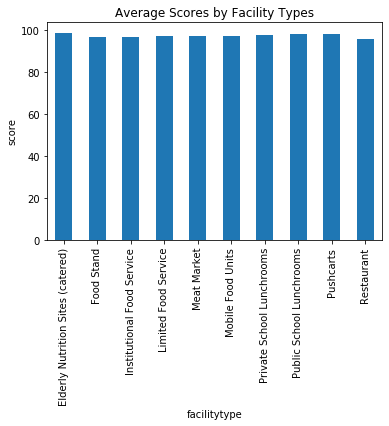

In [120]:
grouped_scores.plot(kind = 'bar', x = 'facilitytype', y = 'score',
                    legend = False, rot = 90, title = 'Average Scores by Facility Types' ).set_ylabel("score")

I want to visualize if there is any relationship between the two quantitative variables: number of previous critical/noncritical strikes and the scores received using a scatter plot. The reason why I want to visualize a relationship is so because I want to see if their previous scores would influence them to either continue to do bad or improve their scores.

In [121]:
previous_non = df[['num_non_critical_previous', 'score']]
previous_non.head()

,num_non_critical_previous,score
0,0.0,96.0
1,0.0,98.0
2,0.0,97.0
3,0.0,99.0
4,0.0,97.0


In [122]:
previous_crit = df[['num_critical_previous', 'score']]
previous_crit.head()

,num_critical_previous,score
0,0.0,96.0
1,0.0,98.0
2,0.0,97.0
3,0.0,99.0
4,0.0,97.0


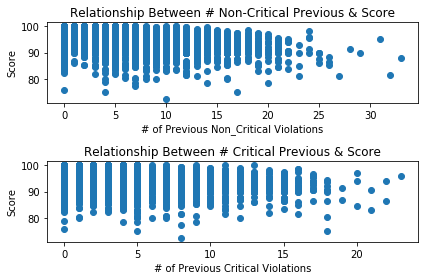

In [123]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(previous_non['num_non_critical_previous'], previous_non['score'])
ax2.scatter(previous_crit['num_critical_previous'], previous_crit['score'])
ax1.set_title('Relationship Between # Non-Critical Previous & Score')
ax2.set_title('Relationship Between # Critical Previous & Score')
ax1.set_xlabel('# of Previous Non_Critical Violations')
ax2.set_xlabel('# of Previous Critical Violations')
ax1.set_ylabel('Score')
ax2.set_ylabel('Score')
fig.tight_layout()

As seen above, it is hard to tell the relationship between whether the previous number of critical or non critical violations have a relationship to score. However, we notice on the right side that there are more lower scores as there are with more violations. So, I would like to visualize the relationship between previous number of violations (critical & non-critical) and scores.

In [124]:
total = (df['num_non_critical_previous'] + df['num_critical_previous']).tolist()
score_arr = df['score'].tolist()
d = {'total_previous': total, 'score': score_arr}
new = pd.DataFrame(data=d)
new.head()

,total_previous,score
0,0.0,96.0
1,0.0,98.0
2,0.0,97.0
3,0.0,99.0
4,0.0,97.0


Text(0, 0.5, 'Score')

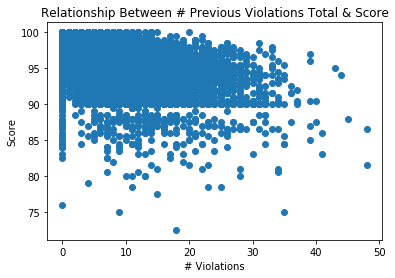

In [125]:
fig, (ax1) = plt.subplots(1)
ax1.scatter(new['total_previous'], new['score'])
ax1.set_title('Relationship Between # Previous Violations Total & Score')
ax1.set_xlabel('# Violations')
ax1.set_ylabel('Score')

As seen above, I notice that there is a negative correlation between number of violations and score which makes sense. Restaurants who tend to have a lower number of total violations will receive higher scores while restaurants who break more violations tend to receive lower scores. Now, I want to find the pairwise correlation of all columns in the dataframe so I can see the correlation values between each column and `below_80`. I plan to find which variables correlate with `below_80` the most so I can use these features to classify whether the score received an 80 or lower.

In [126]:
corrs = df.corr(method = 'pearson')
corrs.head()

,hsisid,days_from_open_date,x,y,zip,inspection_num,score,num_critical,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical,below_80
hsisid,1.000000,0.185845,0.057797,-0.050541,-0.017472,0.135118,0.192693,-0.154552,-0.164241,-0.124146,-0.119939,-0.198457,-0.197171,-0.006387,0.013323,0.034335,-0.028550,-0.090567,-0.010602
days_from_open_date,0.185845,1.000000,0.063241,-0.025831,0.032684,0.311632,0.057948,-0.100558,-0.007113,-0.010905,0.087953,-0.082563,0.041950,-0.021240,0.033276,0.055356,0.029837,-0.083739,-0.008118
x,0.057797,0.063241,1.000000,0.405044,0.505003,0.022246,0.062681,-0.132890,0.002741,-0.109977,0.016114,-0.156760,0.055372,-0.266739,0.100940,0.081562,0.036797,-0.054007,-0.015824
y,-0.050541,-0.025831,0.405044,1.000000,0.482886,-0.045519,0.043351,-0.086611,0.025509,-0.075803,0.017404,-0.062912,0.059963,-0.090891,0.110337,-0.042955,-0.035593,-0.079159,0.002352
zip,-0.017472,0.032684,0.505003,0.482886,1.000000,-0.028818,0.023509,-0.093416,-0.010434,-0.075035,-0.005721,-0.061310,0.056180,-0.100621,0.099306,0.017470,-0.004531,-0.051629,-0.007728


I will do an Exploratory Data Analysis on the data first by checking which variables correlate to a score of 80 or lower the most by finding the correlation values for every variable and `below_80` score. Using the variables that correlate with the outcome the most, I will create a pipeline model to classify the score based on the features to find the accuracy score to find which features give the best.

In [134]:
# EDA
corrs['below_80'].sort_values(ascending=False)

below_80                          1.000000
num_critical                      0.104468
num_non_critical                  0.070981
num_critical_mean_previous        0.051289
num_non_critical_mean_previous    0.041478
num_critical_previous             0.037751
num_non_critical_previous         0.032777
avg_neighbor_num_critical         0.013147
critical                          0.012991
avg_neighbor_num_non_critical     0.006727
y                                 0.002352
inspection_num                    0.001010
second_match                      0.000251
top_match                        -0.004536
zip                              -0.007728
days_from_open_date              -0.008118
hsisid                           -0.010602
x                                -0.015824
score                            -0.190361
Name: below_80, dtype: float64

As you can see, the variables that correlate to restaurants receiving an 80 or lower are: `num_critical`, `num_non_critical`, `num_critical_mean_previous`, and `num_non_critical_mean_previous`. This makes sense as the number of critical and non-critical violations that the restaurant receive that inspection heavily influences what score they receive. Also, their average previous scores would also influence what scores they receive as the visualization from earlier showed that number of violations correlate with score.

Using the the variables with positive correlation values, I will create a pipeline that will transform these numerical features into standardized values to put into a pipeline to use a DecisionTreeClassifier to classify whether the restaurant received a 80 or below based on the transformed features. I planned to use nominal data as well but from the correlation values above, those variables have no relationship to score. I will split the X and Y into train and test data to fit it on the training data to predict for the <i> unseen </i> data.

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
num_features = ['num_critical', 'num_non_critical', 'num_critical_mean_previous',
                'num_non_critical_mean_previous','num_critical_previous', 'num_non_critical_previous']
p = Pipeline([('scaler', StandardScaler())])
pre = ColumnTransformer([('num', p, num)])
pl = Pipeline([('preproc', pre), ('classifier', DecisionTreeClassifier(max_depth=4, min_samples_split = 2, min_samples_leaf=2))])
X = df.drop('below_80', axis=1)
Y = df['below_80']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
pl.fit(X_train,Y_train)
pl.score(df.drop('below_80', axis = 1), df['below_80'])

0.9992418498862775

The cell above prints out the accuracy for the predictions for the classification of a score of 80 or below based on the features that correlate to score the most. The model I created received a almost perfect score which made sense as I used features that related to score the most. Now, I want to see if `facilitytype` has a statistically significant relationship with score and investigate whether my hypothesis of food stands and push carts receiving lower scores than restaurants. I will group food stands and push carts into one data frame to run a hypothesis testing to compare the difference in means of scores for the 2 samples: restaurants & food stands/push carts.

<b> Null Hypothesis: </b> There is no difference between food stands/pushcarts and restaurants.

<b> Alternative Hypothesis: </b> There is a difference between food stand/pushcarts and restaurants.

<b> Significance Value: </b> 0.05

In [129]:
df.groupby('facilitytype')['below_80'].mean()
df.head()

,hsisid,date,city,state,postalcode,restaurantopendate,days_from_open_date,facilitytype,x,y,...,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical,below_80
0,4092013748,2012-09-21T00:00:00Z,raleigh,NC,27610,2002-12-21T00:00:00Z,3562,Restaurant,-78.587963,35.783914,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0
1,4092014046,2012-09-21T00:00:00Z,raleigh,NC,27610,2004-05-04T00:00:00Z,3062,Restaurant,-78.549673,35.791986,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,0,0
2,4092015191,2012-09-21T00:00:00Z,raleigh,NC,27610,2008-08-04T00:00:00Z,1509,Restaurant,-78.547960,35.723125,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0
3,4092016122,2012-09-21T00:00:00Z,cary,NC,27513,2012-03-28T00:00:00Z,177,Restaurant,-78.815727,35.799249,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0
4,4092021513,2012-09-21T00:00:00Z,zebulon,NC,27597,2008-02-25T00:00:00Z,1670,Food Stand,-78.296347,35.831285,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0


In [130]:
non_restaurants = df[(df['facilitytype']=='Pushcarts') | (df['facilitytype']=='Food Stand')]
non_restaurants = non_restaurants.reset_index(drop=True)
non_restaurants.head()

,hsisid,date,city,state,postalcode,restaurantopendate,days_from_open_date,facilitytype,x,y,...,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical,below_80
0,4092021513,2012-09-21T00:00:00Z,zebulon,NC,27597,2008-02-25T00:00:00Z,1670,Food Stand,-78.296347,35.831285,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0
1,4092020999,2012-09-27T00:00:00Z,apex,NC,27502,2000-12-31T00:00:00Z,4288,Food Stand,-78.877707,35.759649,...,0.0,0.0,3.276783,5.539424,5.000000,5.400000,4.092110e+09,4.092050e+09,1,0
2,4092021009,2012-10-01T00:00:00Z,raleigh,NC,27609-4436,2000-07-01T00:00:00Z,4475,Food Stand,-78.640597,35.854991,...,0.0,0.0,3.276783,5.539424,6.400000,8.600000,4.092016e+09,4.092016e+09,1,0
3,4092021010,2012-10-01T00:00:00Z,raleigh,NC,27609-4436,2000-07-01T00:00:00Z,4475,Food Stand,-78.640597,35.854991,...,0.0,0.0,3.276783,5.539424,6.400000,8.600000,4.092016e+09,4.092016e+09,1,0
4,4092021170,2012-10-01T00:00:00Z,raleigh,NC,27607,2003-02-05T00:00:00Z,3526,Food Stand,-78.683595,35.793391,...,0.0,0.0,3.276783,5.539424,6.400000,5.200000,4.092012e+09,4.092014e+09,1,0


In [131]:
restaurants = df[df['facilitytype']=='Restaurant']
restaurants = restaurants.reset_index(drop=True)
restaurants.head()

,hsisid,date,city,state,postalcode,restaurantopendate,days_from_open_date,facilitytype,x,y,...,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical,below_80
0,4092013748,2012-09-21T00:00:00Z,raleigh,NC,27610,2002-12-21T00:00:00Z,3562,Restaurant,-78.587963,35.783914,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0
1,4092014046,2012-09-21T00:00:00Z,raleigh,NC,27610,2004-05-04T00:00:00Z,3062,Restaurant,-78.549673,35.791986,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,0,0
2,4092015191,2012-09-21T00:00:00Z,raleigh,NC,27610,2008-08-04T00:00:00Z,1509,Restaurant,-78.547960,35.723125,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0
3,4092016122,2012-09-21T00:00:00Z,cary,NC,27513,2012-03-28T00:00:00Z,177,Restaurant,-78.815727,35.799249,...,0.0,0.0,3.276783,5.539424,3.374616,5.738676,4.092031e+09,4.092036e+09,1,0
4,4092013134,2012-09-24T00:00:00Z,raleigh,NC,27606-2720,2000-04-14T00:00:00Z,4546,Restaurant,-78.695656,35.766739,...,0.0,0.0,3.276783,5.539424,3.000000,6.400000,4.092014e+09,4.092016e+09,1,0


In [132]:
obs_diff = restaurants['below_80'].mean() - non_restaurants['below_80'].mean()
obs_diff

0.0011681268251981644

In [133]:
N = 1000
differences = []
for i in range(N):
    sample1 = restaurants.sample(n = restaurants.shape[0], replace = False).reset_index(drop = True)
    sample2 = non_restaurants.sample(n = non_restaurants.shape[0],replace = False).reset_index(drop = True)
    diff = sample1['below_80'].mean() - sample2['below_80'].mean()
    differences.append(diff)
(obs_diff <= pd.Series(differences)).mean()

1.0

Because our p-value is greater than our significance level of 0.05, we fail to reject the null hypothesis of how food stands/push carts and restaurants are not statistically significantly different in the scores they receive. This makes sense as it correlates to what I found earlier where there is an average of 0.00116 more restaurants receiving 80 or lower on their scores compared to other facility types. Even though there is more data on restaurants than food stands/push carts, I believe our sample size is reasonable enough (~3500) to run a hypothesis test. 

# Ethics & Privacy

In upholding data ethics and privacy, I understand that the data was given to me by the instructors of COGS 108 where I was unable to find additional data from outside sources. Therefore, I should be respectful by not including the names of restaurants as they would like to keep their repuation as a business. One failed inspection shouldn't define a restaurant as they can improve their sanitation to receive better scores. Due to the fact that I did not have their verbal/written consent, I must not include informatin that can uniquely identify an individual such as name, address, and phone number according to the Safe Harbor guidelines. I would like to acknowledge the restaurants and health inspectors for giving me an opportunity to use this data to further investigate my question. 

I have no idea how the data was collected which means that there can be many discreptancies about my data that could alter my results which I have to keep in mind. There may be bias in how the data was collected as all humans are not the same. For example, different restaurants could receive different scores based on the inspector. There may be inspectors who are more lenient or harsh than others. However, I believe that I dealt with this discreptancy while creating my pipeline model as I standardized the quantitative data values so that it makes it easier to compare the scores. Another thing that can be biased about the data is how restaurants can lie to inspectors about some thing which could skew the data which I could not really account for in my analysis.

# Conclusion & Discussion

Throughout my data analysis and visualizations, I conclude that the most important aspects of a restaurant that contributes to them having a inspection score of 80 or lower are: the number of critical violations and non-critical violations committed on current and previous inspections. This contradicts my hypothesis as I believed that only the facility type and the number of previous critical violations would heavily influence if a restaurant received an 80 or lower. However, it turned out that all 4 of the variables influence the score. Obviously, the number of critical and non-critical violations done for that inspection will heavily determine the score. However, it turns out that the previous number of violations also determine the score whether it is critical or not. This concurs with my visualization that shows the relationship between previous violations and score which means that restaurants who broke more violations tend to receive lower scores in their future inspections. This could occur because restaurants who break too many violations are forced to shut down which lowers the businesses' profit. Because their business is failing, they either give up on their business or do not have the money to keep it sanitary. Additionally, it turns out that there are no other variables, especially nominal data, that can contribute to the score such as `geostatuscode`.

Furthermore, my analysis showed that there is no significant difference between facility types which surprises me. I hypothesized that businesses with a smaller facility type are more likely to receive a lower score due to the lack of resoruces. As previously mentioned, I ran a simulation on two different facility types, food stands/push carts & restaurants where I had data on 11985 restaurants and 3380 food stands/push carts. Both of these samples are a reasonable sample since, but I am quite weary with whether standardizing these values made a difference on the analysis. I feel like the data limitation of having fewer data on food stands/push carts should be considered as it may seem like there is no difference on the two samples right now, but could be different when the two samples are comparable sizes. This is called the Simpson Effect. Overall, this can be helpful in speeding up the health inspection process as counties can spend their time inspecting restaurants with a bad history of breaking a large number of violations first. 